# TensorFlow and Neural Networks

## Introductory Neural Netwoks

### Amanda Bowers

#### May 20, 2017

## Objectives

* Use TensorFlow to do calculations.
* Know the advantages and disadvantages of neural networks.
* Explain the basic neural-network algorithms.
* Know the competing softwares and how TensorFlow differs. What are advantages/ disadvantages
* Build a simple neural network in TensorFlow.

## What are Neural Networks?

Neural Networks were originally developed in the 1950's using the neurons in the brain as inspiration.

In the brain, we have neurons connected together by dendrons of different strengths, and these strength change as we learn. The connections are non-linear; a neural doesn't activate at all until it has sufficient input.

Just an * analogy * Brains are an inspiration, not a model, and trying to fit to closely to them hasn't always helped researchers.

### Terminology

Researchers are trying to move away from the connotations of the word 'nueral' being associated with 'brains'. Other popular terms for NN include:

 * deep learning 
 * Artificial neral networks
 * Connectionism (popular in '80s)
 * Parallel distributed processing (https://mitpress.mit.edu/books/parallel-distributed-processing)


## Why Neural Networks?

In general, neural networks perform well with high-dimensional data such as images, audio, and text.

Disadvantages

 * Hard to design/tune
 * Slow to train
 * Uninterpretable
 * Easy to overfit (need a lot of data)
 
Advantange

 * Works well with high-dimensional data
 * Can find almost anything, when designed correctly
 * Online training


## Out first neural network

Although neural networks are typically used for applications, they can be used to fit other problems. Let's try to fit a sinusoidal curve to some noisy data.

In [3]:
import tensorflow as tf
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
npts = 10000
x_train = scs.uniform(-5, 10).rvs(npts)
y_train = np.sin(x_train) + scs.norm(0, 1.0).rvs(npts)

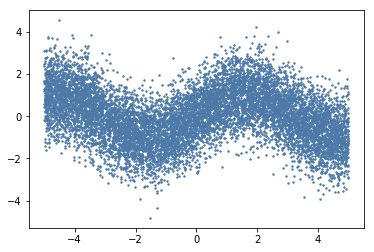

In [5]:
fig,ax = plt.subplots()
ax.scatter(x_train, y_train, s=2)

First, we create placeholders where we train the data. The first dimension of each is `None` because we'll train it with a bunch of points at once. The second dimension is `1` because the x and y are each one-dimensional.

In [6]:
x = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.placeholder(tf.float32, shape=[None, 1])

Now we build a network with one hidden layer with 5 units. `W_0` and `W_1` are the strengths of the connections between the input and hidden layer, and the hidden layer and the output. We initialize these randomly.

The biases `b_0` and `b_1` are the intercept terms. We typically start them wiht some non-zero value.

In [7]:
n_hidden = 5

W_0 = tf.Variable(tf.truncated_normal([1, n_hidden]), name='W_0')
b_0 = tf.Variable(tf.constant(0.1, shape=[n_hidden]), name='b_0')
h_0 = tf.matmul(x, W_0) + b_0
W_1 = tf.Variable(tf.truncated_normal([n_hidden, 1]), name='W_1')
b_1 = tf.Variable(tf.constant(0.1, shape=[1]), name='b_1')

yhat = tf.matmul(h_0, W_1) + b_1

Now we specify a loss function. We'll use the residual sum of squares. Alternatively, we could have used cross entropy.

In [8]:
loss = tf.reduce_sum(tf.square(yhat - y))

We create an optimizer function and use that to minimize the loss.

In [9]:
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

When we run the `train` tensor, TensorFlow will update the variables in the graph in the direction of minimizing the `loss`.

Before we can do this, we need to create an session.

In [10]:
sess = tf.InteractiveSession()

And evaluate the global variables initializer.

In [11]:
init = tf.global_variables_initializer()
init.run()

We can now run the train step a bunch of times, feeding in the data each time.

In [12]:
for i in range(2000):
    sess.run(train, feed_dict={x:np.array(x_train).reshape(-1,1), y:y_train.reshape(-1,1)})

And plot the results. Note we're only fitting the curve between -5 and 5 as shown by the vertical lines. Red is predicted; blue is the actual curve.

(-7, 7)

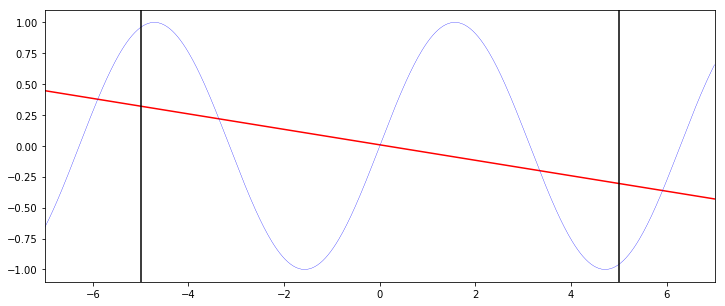

In [13]:
x_actual = np.linspace(-7,7,500)
y_actual = np.sin(x_actual)

fig,ax = plt.subplots(figsize=(12,5))
y_pred = sess.run(yhat, {x:x_actual.reshape(-1,1)})
ax.plot(x_actual,y_pred, 'r-')
ax.plot(x_actual,y_actual, 'b-', lw=0.3)

ax.axvline(-5, color='k')
ax.axvline(5, color='k')
ax.set_xlim((-7,7))

## Introducing non-linearity

The problem is that our network is completely linear, so no matter what the weights the output is a linear function of the input. In order to fix this, we need to provide some sort of non-linear function at each of the layers.

There are a number of different functions we can use.

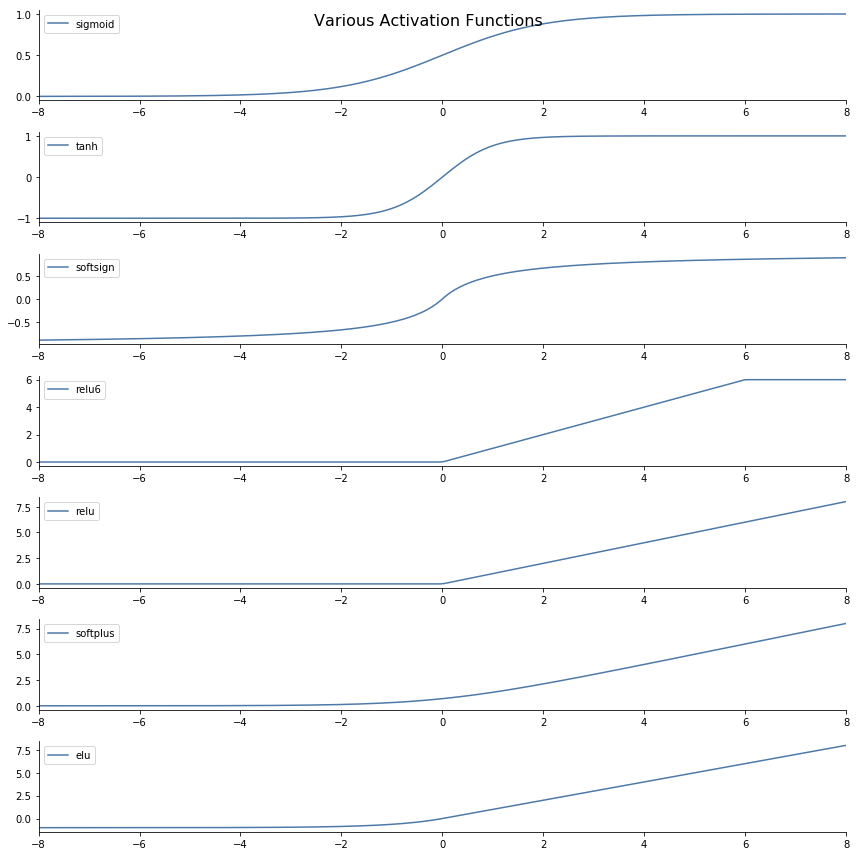

In [14]:
xpts = np.linspace(-8, 8, 200)

functions = [tf.nn.sigmoid,
             tf.nn.tanh,
             tf.nn.softsign,
             tf.nn.relu6,
             tf.nn.relu,
             tf.nn.softplus,
             tf.nn.elu]

fig,axes = plt.subplots(len(functions), figsize=(12,12))

for ax, func in zip(axes, functions):
    ax.plot(xpts, func(xpts).eval(), label=func.__name__)
    ax.legend(loc='upper left')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(xpts.min(), xpts.max())

fig.suptitle('Various Activation Functions', fontsize=16)
fig.tight_layout()

In the 90's the sigmoid curve was popular for a couple reasons. First, a sigmoid function behaves similarly to actual neurons: they don't activate until they reach a threshold, and then max out. Second, it was thought that differentiability was a Good Thing.

With experience people learned rectified linear units (relu) were generally better because saturation is bad, and it's good enough that functions are differentiable almost everywhere.

So we'll use relu (also for pedagogical reasons).

In [15]:
n_hidden = 5

W_0 = tf.Variable(tf.random_normal([1, n_hidden]), name='W_0')
b_0 = tf.Variable(tf.constant(0.1, shape=[n_hidden]), name='b_0')
h_0 = tf.nn.relu(tf.matmul(x, W_0) + b_0)
#h_0 = tf.nn.sigmoid(tf.matmul(x, W_0) + b_0)
W_1 = tf.Variable(tf.random_normal([n_hidden, 1]), name='W_1')
b_1 = tf.Variable(tf.constant(0.1, shape=[1]), name='b_1')

yhat = tf.matmul(h_0, W_1) + b_1

loss = tf.reduce_sum(tf.square(yhat - y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

In [16]:
init = tf.global_variables_initializer()
sess.run(init)

In [17]:
for i in range(1000):
    sess.run(train, feed_dict={x:np.array(x_train).reshape(-1,1), y:y_train.reshape(-1,1)})

(-7, 7)

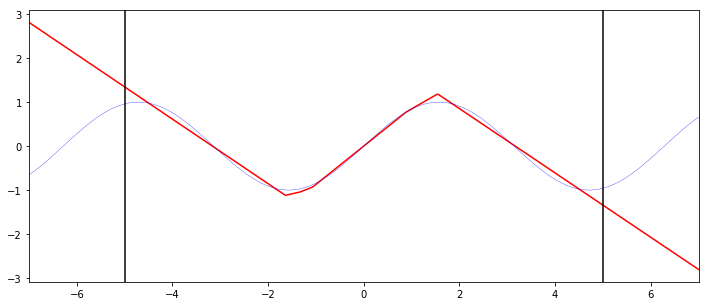

In [18]:
x_actual = np.linspace(-7,7,500)
y_actual = np.sin(x_actual)

fig,ax = plt.subplots(figsize=(12,5))
y_pred = sess.run(yhat, {x:x_actual.reshape(-1,1)})
ax.plot(x_actual,y_pred, 'r-')
ax.plot(x_actual,y_actual, 'b-', lw=0.3)

ax.axvline(-5, color='k')
ax.axvline(5, color='k')
ax.set_xlim((-7,7))

In [19]:
n_hidden = 5

W_0 = tf.Variable(tf.random_normal([1, n_hidden]), name='W_0')
b_0 = tf.Variable(tf.constant(0.1, shape=[n_hidden]), name='b_0')
h_0 = tf.nn.relu(tf.matmul(x, W_0) + b_0)
W_1 = tf.Variable(tf.random_normal([n_hidden, 1]), name='W_1')
b_1 = tf.Variable(tf.constant(0.1, shape=[1]), name='b_1')

yhat = tf.matmul(h_0, W_1) + b_1

loss = tf.reduce_sum(tf.square(yhat - y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

## Regularization

Since neural networks have a large number of parameters, they are fairly easy to overfit (partucularly if there aren't all that many data points). To avoid this most neural networks include some sort of regularization. There are a number of different approaches.

The most popular approach is dropout.


One approach is the same sort of L1 or L2 regularlization on the connection weights; these have similar effect to a linear model. TensorFlow has special operations to compute L2 loss (`tensorflow.nn.l1_loss`) but it's not hard to compute otherwise. 

Another approach is tying some of the weights together, by imposing a penalty based on the differences between certain parameters. The extreme example of this is **parameter sharing**. For this we require many of the parameters to be the same. An example of this is **convolutional neural networks** which are used to process images.

In CNNs, the pixels of an image are mapped to multiple channels of the same size, with weights connecting the images in the input to the pixels of each of the output channels. However, pixels are only connected to nearby pixels in the output (typically, in a 5x5 region) and the parameters corresponding to the same offset (e.g., (+1, -2)) are force to be identical. This allows translational invariance.

Other networks that uses parameter sharing are **recurrent neural networks**, which are used for time-series data. Unlike ordinary neural networks which have a single feedforward step, RNNs are executed in an arbitrary number of steps, with output or hidden units feeding back into earlier units in the network, and the input added sequentially at each step. Training these involves unwinding them in time, so parameters are shared across time rather than space.


# Competing Software

Tensorflow is written in C++ on backend. Someday we might want to use one of the other packages out there

## Theano (Keras)

## Torch

## Caffe